# Open IIT Data analytics 2019


In [1]:
%matplotlib inline
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#loading the data
df = pd.read_csv('./Copy of Insurance_Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


**DATA PREPROCESSING**

1-Firstly we will handle missing values in the dataset

In [2]:
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [3]:
df['Income_monthly_auto']=df['Income']*df['Monthly Premium Auto']
df['monthly_with_no_of_policy']=df['Monthly Premium Auto']*df["Number of Policies"]

No missing values are found

Let's carry on with preprocessing

2 - Basic data manipulation

In [4]:
#Renaming the columnns (removing space delimitation)
df = df.rename(columns = {'Customer Lifetime Value':'CLV', 'EmploymentStatus': 'EmploymentStatus', 'Location Code':'LocationCode', 'Marital Status': 'MaritalStatus','Monthly Premium Auto':'MonthlyPremiumAuto', 'Months Since Last Claim':'MonthsSinceLastClaim','Months Since Policy Inception':'MonthsSincePolicyInception','Number of Open Complaints':'NumberOfOpenComplaints','Number of Policies':'NumberofPolicies','Policy Type':'PolicyType','Policy':'PolicySubType','Renew Offer Type':'RenewOfferType','Sales Channel':'SalesChannel','Total Claim Amount':'TotalClaimAmount','Vehicle Class':'VehicleClass','Vehicle Size':'VehicleSize'})
list(df.columns.values)

del df['Customer']
del df['Effective To Date']
del df['VehicleSize']

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CLV,9134.0,8.004940e+03,6.870968e+03,1898.007675,3994.251794,5.780182e+03,8.962167e+03,8.332538e+04
Income,9134.0,3.765738e+04,3.037990e+04,0.000000,0.000000,3.388950e+04,6.232000e+04,9.998100e+04
MonthlyPremiumAuto,9134.0,9.321929e+01,3.440797e+01,61.000000,68.000000,8.300000e+01,1.090000e+02,2.980000e+02
MonthsSinceLastClaim,9134.0,1.509700e+01,1.007326e+01,0.000000,6.000000,1.400000e+01,2.300000e+01,3.500000e+01
MonthsSincePolicyInception,9134.0,4.806459e+01,2.790599e+01,0.000000,24.000000,4.800000e+01,7.100000e+01,9.900000e+01
NumberOfOpenComplaints,9134.0,3.843880e-01,9.103835e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,5.000000e+00
NumberofPolicies,9134.0,2.966170e+00,2.390182e+00,1.000000,1.000000,2.000000e+00,4.000000e+00,9.000000e+00
TotalClaimAmount,9134.0,4.340888e+02,2.905001e+02,0.099007,272.258244,3.839454e+02,5.475148e+02,2.893240e+03
Income_monthly_auto,9134.0,3.492977e+06,3.227904e+06,0.000000,0.000000,2.933972e+06,5.397016e+06,2.547444e+07
monthly_with_no_of_policy,9134.0,2.755806e+02,2.577240e+02,61.000000,105.000000,1.880000e+02,3.570000e+02,2.664000e+03


3- Anamoly Detection and removal

In [5]:
#Now we will treat the outliers , by replacing those values with the median values (using Interuartile Method)
#Calculating Missing Values for CLV variable
first_quantile_CLV = df['CLV'].quantile(0.25)
third_quantile_CLV = df['CLV'].quantile(0.75)
IQR_CLV = third_quantile_CLV - first_quantile_CLV
#Range for Outliers
up_threshold_CLV=third_quantile_CLV+1.5*IQR_CLV
print("Upper Threshold of CLV: ",up_threshold_CLV)

#Calculating Missing Values for Income variable
first_quantile1 = df['Income'].quantile(0.25)
third_quantile1 = df['Income'].quantile(0.75)
IQR1 = third_quantile1 - first_quantile1
#Range for Outliers
up_threshold1=third_quantile1+1.5*IQR1
print("Upper threshold of income:", up_threshold1)

# Removing anomalous datapoints 
# Where "MonthsSincePolicyInception" < "MonthsSinceLastClaim"  and there is only 1 or no policy
# Where Income is 0 and CLV is greater than upper threshold of CLV

i=0
inception = df['MonthsSincePolicyInception']
last = df['MonthsSinceLastClaim']
number = df ['NumberofPolicies']
for i in range (0,len(inception)):
    if ( ((inception[i]<last[i]) & (number[i]<2)) or ((df['Income'][i]<=0) & (df['CLV'][i]>16414.0)) ):
        df.drop([i], inplace=True)
        
df.head()

Upper Treshold of CLV:  16414.039911750002
Upper threshold of income: 155800.0


,State,CLV,Response,Coverage,Education,EmploymentStatus,Gender,Income,LocationCode,MaritalStatus,...,NumberOfOpenComplaints,NumberofPolicies,PolicyType,PolicySubType,RenewOfferType,SalesChannel,TotalClaimAmount,VehicleClass,Income_monthly_auto,monthly_with_no_of_policy
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,0,752
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,5266836,216
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,0,742
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,3200028,73
5,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,Rural,Married,...,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,4340238,138


4 - Encoding categorical variables based on their correlation with CLV values

In [6]:
def corr_with_clv(col_name):
    dic={}
    no_cat,cat=(df[col_name].nunique(),df[col_name].unique())
    value_count=dict(df[col_name].value_counts())
    print(f'value counts = {value_count}')
    print("Correlation with CLV value")
    for i in range(no_cat):
        dic[cat[i]]=df.loc[df[col_name] == cat[i], 'CLV'].sum()/value_count[cat[i]]

    return dic
  
  
for col in df.columns:
  if df[col].dtype == 'object':
    print("Feature : ",col)   
    print(corr_with_clv(col))
    print()
    print()

    
df.to_csv('E:/without_encode.csv')

Feature :  State
value counts = {'California': 2921, 'Oregon': 2393, 'Arizona': 1572, 'Nevada': 794, 'Washington': 732}
Correlation with CLV value
{'Arizona': 7794.210284903309, 'Nevada': 8071.1020027644845, 'California': 7820.598872972612, 'Washington': 7692.521876677596, 'Oregon': 8027.041039030923}


Feature :  Response
value counts = {'No': 7200, 'Yes': 1212}
Correlation with CLV value
{'No': 7890.672056017361, 'Yes': 7864.4548538118825}


Feature :  Coverage
value counts = {'Basic': 5140, 'Extended': 2516, 'Premium': 756}
Correlation with CLV value
{'Extended': 8672.351962149842, 'Premium': 10736.393177034393, 'Basic': 7083.308814696109}


Feature :  Education
value counts = {'Bachelor': 2536, 'College': 2442, 'High School or Below': 2415, 'Master': 689, 'Doctor': 330}
Correlation with CLV value
{'Bachelor': 7796.397207557176, 'College': 7717.1522294197375, 'Master': 8337.609240422353, 'High School or Below': 8082.7635034380955, 'Doctor': 7464.0072608575765}


Feature :  Employmen

For those features where score is nearly same for all classes we used one hot encoding while for those features where class scores are unbalanced we mapped the code codes manually

In [7]:
one_hot = pd.get_dummies(df['EmploymentStatus'])
df = df.join(one_hot)
del df['EmploymentStatus']

df.replace({'PolicySubType':{'Personal L3': 1, 'Corporate L2': 0, 'Personal L1': 1, 'Corporate L3': 0, 'Special L2': 2, 'Corporate L1': 2, 'Personal L2': 2, 'Special L1': 2, 'Special L3': 2}}, inplace=True)

one_hot = pd.get_dummies(df['MaritalStatus'])
df = df.join(one_hot)
del df['MaritalStatus']

one_hot = pd.get_dummies(df['LocationCode'])
df = df.join(one_hot)
del df['LocationCode']

one_hot = pd.get_dummies(df['Education'])
df = df.join(one_hot)
del df['Education']

one_hot = pd.get_dummies(df['SalesChannel'])
df = df.join(one_hot)
del df['SalesChannel']

df.replace({'RenewOfferType':{'Offer1':3 , 'Offer2':2 , 'Offer3':1 , 'Offer4':0}}, inplace=True)
df.replace({'Coverage':{'Basic':0 , 'Extended':1 , 'Premium':2 }}, inplace=True)
df.replace({'PolicyType':{'Personal Auto':0 , 'Corporate Auto':1 , 'Special Auto':2 }}, inplace=True)
encode = {"VehicleClass": {"Four-Door Car":0, "Two-Door Car":1,"SUV":2,"Sports Car":3,"Luxury SUV":5,"Luxury Car":4}}
df.replace(encode, inplace=True)

df.replace({'Gender':{'M':1 , 'F':0}}, inplace=True)

df.replace({'Response':{'Yes':1 , 'No':0}}, inplace=True)

one_hot = pd.get_dummies(df['State'])
df = df.join(one_hot)
del df['State']

In [8]:
df.head()

,CLV,Response,Coverage,Gender,Income,MonthlyPremiumAuto,MonthsSinceLastClaim,MonthsSincePolicyInception,NumberOfOpenComplaints,NumberofPolicies,...,Master,Agent,Branch,Call Center,Web,Arizona,California,Nevada,Oregon,Washington
1,6979.535903,0,1,0,0,94,13,42,0,8,...,0,1,0,0,0,1,0,0,0,0
2,12887.431650,0,2,0,48767,108,18,38,0,2,...,0,1,0,0,0,0,0,1,0,0
3,7645.861827,0,0,1,0,106,18,65,0,7,...,0,0,0,1,0,0,1,0,0,0
4,2813.692575,0,0,1,43836,73,12,44,0,1,...,0,1,0,0,0,0,0,0,0,1
5,8256.297800,1,0,0,62902,69,14,94,0,2,...,0,0,0,0,1,0,0,0,1,0


5- Removing outlier using Interquantile range

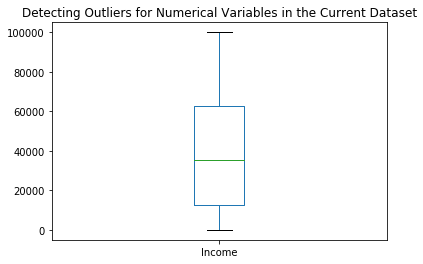

In [9]:
plot1 = df[['Income']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

#Calculating Missing Values for Income variable
first_quantile1 = df['Income'].quantile(0.25)
third_quantile1 = df['Income'].quantile(0.75)
IQR1 = third_quantile1 - first_quantile1
#Range for Outliers
up_threshold1=third_quantile1+1.5*IQR1
up_threshold1
down_threshold1=first_quantile1-1.5*IQR1
down_threshold1
#Treatment
median1 = float(df['Income'].median())
median1
df["Income"] = np.where(df["Income"] >up_threshold1, median1,df['Income'])



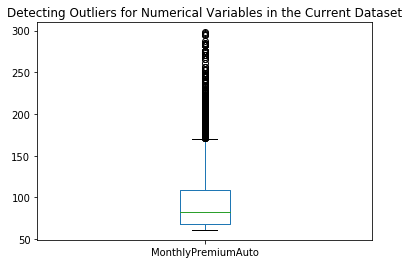

In [10]:
plot1 = df[['MonthlyPremiumAuto']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

#Calculating Missing Values for Monthly Premium Auto variable
first_quantile2 = df['MonthlyPremiumAuto'].quantile(0.25)
third_quantile2 = df['MonthlyPremiumAuto'].quantile(0.75)
IQR2 = third_quantile2 - first_quantile2
#Range for Outliers
up_threshold2=third_quantile2+1.5*IQR2
up_threshold2
down_threshold2=first_quantile2-1.5*IQR2
down_threshold2
#Treatment
median2 = float(df['MonthlyPremiumAuto'].median())
median2
df["MonthlyPremiumAuto"] = np.where(df["MonthlyPremiumAuto"] >up_threshold2, median2,df['MonthlyPremiumAuto'])
df["MonthlyPremiumAuto"] = np.where(df["MonthlyPremiumAuto"] <down_threshold2, median2,df['MonthlyPremiumAuto'])

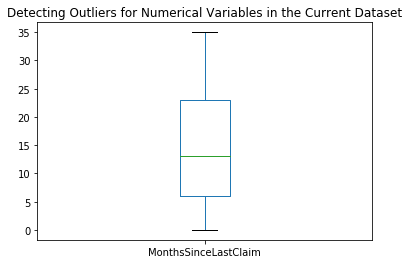

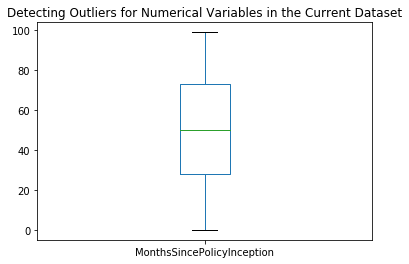

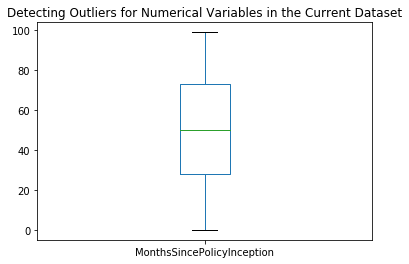

In [11]:
plot1 = df[['MonthsSinceLastClaim']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

plot1 = df[['MonthsSincePolicyInception']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

plot1 = df[['MonthsSincePolicyInception']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

#Calculating Missing Values for No of Policies variable
first_quantile4 = df['NumberofPolicies'].quantile(0.25)
third_quantile4 = df['NumberofPolicies'].quantile(0.75)
IQR4 = third_quantile4 - first_quantile4
#Range for Outliers
up_threshold4=third_quantile4+1.5*IQR4
up_threshold4
down_threshold4=first_quantile4-1.5*IQR4
down_threshold4
#Treatment
median4 = float(df['NumberofPolicies'].median())
median4
df["NumberofPolicies"] = np.where(df["NumberofPolicies"] >up_threshold4, median4,df['NumberofPolicies'])



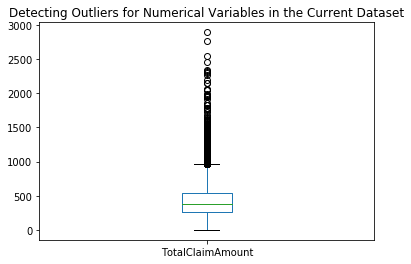

In [12]:
plot1 = df[['TotalClaimAmount']].plot.box()
plt.title('Detecting Outliers for Numerical Variables in the Current Dataset')
plt.show()

#Calculating Missing Values for Total Claim Amount variable
first_quantile3 = df['TotalClaimAmount'].quantile(0.25)
third_quantile3 = df['TotalClaimAmount'].quantile(0.75)
IQR3 = third_quantile3 - first_quantile3
#Range for Outliers
up_threshold3=third_quantile3+1.5*IQR3
up_threshold3
down_threshold3=first_quantile3-1.5*IQR3
down_threshold3
#Treatment
median3 = float(df['TotalClaimAmount'].median())
median3
df["TotalClaimAmount"] = np.where(df["TotalClaimAmount"] >up_threshold3, median3,df['TotalClaimAmount'])



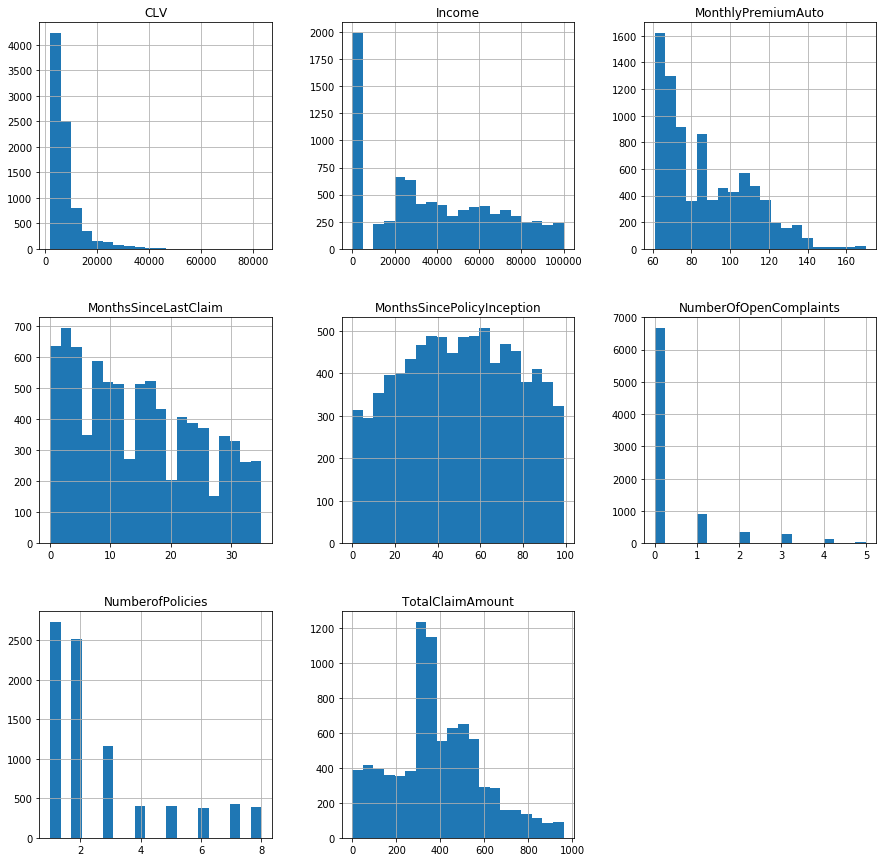

In [14]:
column_index = ['CLV','Income','MonthlyPremiumAuto','MonthsSinceLastClaim','MonthsSincePolicyInception','NumberOfOpenComplaints','NumberofPolicies','TotalClaimAmount']
histogram1 = df[column_index].hist(bins=20 , figsize = (15,15))

Checking for Skewness and Kurtosis

In [15]:
df.skew()

CLV                           3.131516
Response                      2.027410
Coverage                      1.036836
Gender                        0.045669
Income                        0.259808
MonthlyPremiumAuto            0.811160
MonthsSinceLastClaim          0.333313
MonthsSincePolicyInception   -0.029014
NumberOfOpenComplaints        2.772523
NumberofPolicies              1.266963
PolicyType                    1.646512
PolicySubType                -0.181316
RenewOfferType               -0.733741
TotalClaimAmount              0.349880
VehicleClass                  1.340102
Income_monthly_auto           1.150828
monthly_with_no_of_policy     2.182854
Disabled                      4.334900
Employed                     -0.578776
Medical Leave                 4.228310
Retired                       5.444893
Unemployed                    1.241532
Divorced                      1.942327
Married                      -0.344577
Single                        1.074286
Rural                    

In [16]:
df.kurtosis()

CLV                           15.062111
Response                       2.110895
Coverage                      -0.094295
Gender                        -1.998390
Income                        -1.082890
MonthlyPremiumAuto            -0.134463
MonthsSinceLastClaim          -1.024296
MonthsSincePolicyInception    -1.069103
NumberOfOpenComplaints         7.646591
NumberofPolicies               0.513690
PolicyType                     1.780399
PolicySubType                 -0.877255
RenewOfferType                -0.601834
TotalClaimAmount              -0.078564
VehicleClass                   1.544670
Income_monthly_auto            2.122880
monthly_with_no_of_policy      7.006629
Disabled                      16.795353
Employed                      -1.665415
Medical Leave                 15.882384
Retired                       27.653439
Unemployed                    -0.458707
Divorced                       1.773055
Married                       -1.881714
Single                        -0.846111


6- Scaling the features

In [17]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X=df.drop('CLV',axis=1)
y=df["CLV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.preprocessing import StandardScaler, MinMaxScaler


sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.linear_model import LinearRegression
le=LinearRegression()

le.fit(X_train, y_train)
y_pred = le.predict(X_test)

In [18]:
print('R square: ',metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square:  0.2051570130257936
Mean Absolute Error: 3516.339518721331
Mean Squared Error: 29547920.735918306
Root Mean Squared Error: 5435.799916840051


In [20]:
import xgboost
xg_reg = xgboost.XGBRegressor(colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)


preds = xg_reg.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 4960.320285


In [21]:
from sklearn.ensemble import RandomForestRegressor
X=df.drop('CLV',axis=1)
y=df["CLV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# sc = MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)



print('R square: ',metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R square:  0.7086286237058228
Mean Absolute Error: 1350.4286623443436
Mean Squared Error: 12795146.384469897
Root Mean Squared Error: 3577.0303862939013


In [24]:
r2=metrics.r2_score(y_test, y_pred)
n=y_test.count()
p=len(df.columns)-1
adj_r2=(1-(1-r2*r2*((n-1)/(n-p-1))))**(.5)
print("Adjusted r squared: ",adj_r2)


Adjusted r squared:  0.7174264696564334


In [25]:
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mean_absolute_percentage_error(y_test,y_pred)

9.503959991003349

In [26]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit


    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)


    grid.fit(X_train, y_train)
    y_pred2=grid.best_estimator_.predict(X_test)
    

    return grid.best_score_ , grid.best_params_,y_pred2


In [27]:
best_score,best_parmas,y_pred2=Grid_Search_CV_RFR(X_train,y_train)

In [28]:
best_score

0.7043077471018069

In [29]:
best_parmas

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 30}

In [30]:
y_pred2

array([ 6381.52737592,  9930.09715331,  5391.00897822, ...,
        5307.7465032 , 19194.84932174,  4534.91530543])

In [31]:
print('R square: ',metrics.r2_score(y_test, y_pred2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
r2=metrics.r2_score(y_test, y_pred2)
n=y_test.count()
p=len(df.columns)-1
adj_r2=(1-(1-r2*r2*((n-1)/(n-p-1))))**(.5)
print("Adjusted r squared: ",adj_r2)
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

mean_absolute_percentage_error(y_test,y_pred2)

R square:  0.7016800736710027
Mean Absolute Error: 1339.8548543050053
Mean Squared Error: 13100281.761822721
Root Mean Squared Error: 3619.431137875498
Adjusted r squared:  0.710391651200128


9.35636698253092